<a href="https://colab.research.google.com/github/Novalanzagp/Novalanza-python-minggu11/blob/main/Novalanza_python_minggu11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [19]:
ls

'05-Ruang Vektor_NDK.gdoc'
 1574764212230.jpg
 1574764213778.jpg
'17_Novalanza Grecea Pasaribu_ASTERISK2020.pdf'
'17_NOVALANZA GRECEA PASARIBU_ATERISK2020(done).pdf'
'(1) VERBAL _ BAHASA INDONESIA (TIU) www.tocpns.com.gdoc'
'2018-12-25 10.07.55 1.jpg'
'2018-12-25 10.13.48 2.jpg'
'(3) SEJARAH I (TWK) www.tocpns.com (1).gdoc'
'71_Novalanza Grecea Pasaribu_11011940204_M4 (1).pdf'
'71_Novalanza Grecea Pasaribu_11011940204_M4.pdf'
 AIB/
 Asterisk/
 Baground/
'CamScanner 10-17-2020 15.46.42_1.jpg'
'CamScanner 10-17-2020 15.46.42_2.jpg'
 Classroom/
'Colab Notebooks'/
 dataset/
'File penting'/
'Foto jurnal asterisk'/
 IMG_20180704_204327_473.jpg
 IMG20180805145844.jpg
 IMG20180805155642.jpg
 IMG20180805155645.jpg
 IMG_20200310_000837_747.jpg
 IMG_20201014_124334.jpg
 IMG_20201111_125051.jpg
 IMG_20201111_125101.jpg
 IMG_20201111_125925.jpg
 InShot_20201109_183720318.mp4
'jurnal praktikum'/
 Kelompok8_TugasEkstraVarkom.pdf.pdf
 Kepanitiaan/
'LATEST TECHNOLOGY OF OPTICAL COMMUNICATION SYSTEM.pdf

In [20]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [21]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [22]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [23]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [24]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [25]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [26]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(420, 64, 64, 3)
(141, 64, 64, 3)


In [27]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [28]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [29]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 76ms/step - loss: 1.6186 - accuracy: 0.2500 - val_loss: 1.5699 - val_accuracy: 0.1702
Epoch 2/25
14/14 [==============================] - 1s 64ms/step - loss: 1.4830 - accuracy: 0.3810 - val_loss: 1.4180 - val_accuracy: 0.4823
Epoch 3/25
14/14 [==============================] - 1s 66ms/step - loss: 1.3187 - accuracy: 0.5238 - val_loss: 1.2257 - val_accuracy: 0.6099
Epoch 4/25
14/14 [==============================] - 1s 65ms/step - loss: 1.1074 - accuracy: 0.6024 - val_loss: 1.0949 - val_accuracy: 0.5816
Epoch 5/25
14/14 [==============================] - 1s 65ms/step - loss: 0.9259 - accuracy: 0.6619 - val_loss: 0.9787 - val_accuracy: 0.6879
Epoch 6/25
14/14 [==============================] - 1s 65ms/step - loss: 0.8170 - accuracy: 0.7071 - val_loss: 0.8579 - val_accuracy: 0.6809
Epoch 7/25
14/14 [==============================] - 1s 66ms/step - loss: 0.7004 - accuracy: 0.7357 - val_loss: 0.8626 - val_accuracy: 0.6312
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


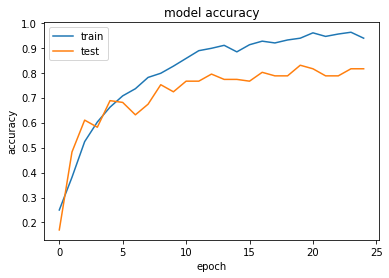

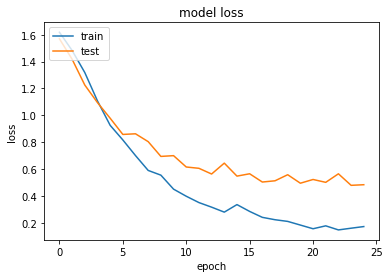

In [30]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.73      0.80      0.76        30
      GMB_02       0.68      0.66      0.67        29
      GMB_03       0.86      0.83      0.85        30
      GMB_05       0.85      0.92      0.88        24
      nonGMB       1.00      0.89      0.94        28

    accuracy                           0.82       141
   macro avg       0.82      0.82      0.82       141
weighted avg       0.82      0.82      0.82       141



In [32]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [34]:
import cv2
import matplotlib.pyplot as plt

FilePath = 'Colab Notebooks'
image1='Salinan IMG_20200827_203235.jpg'

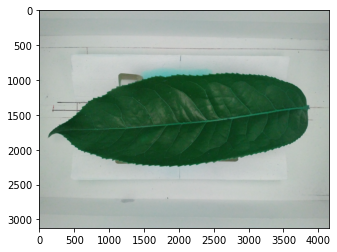

In [35]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [37]:
image_testing = Image.open('Salinan IMG_20200827_203235.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [38]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [39]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.4687408e-04 2.7196051e-04 9.9955231e-01 7.0478914e-06 2.1835755e-05]]
['GMB_03']
